In [64]:
from autograd import multigrad_dict
from sympy import symbols
import numdifftools as nd
import numpy as np
import matplotlib.pyplot as plt
import numdifftools as nd
from scipy import optimize
%matplotlib inline


In [65]:
alpha = 0.01
e = 0.1 
x = [1, 1]

In [66]:
def func(x): 
    return 2*x[0]**2 + 5*x[1]**2 + x[0]*x[1] - 3*x[0] - x[1] + 5

In [67]:
def find_d(f):
    return f.diff(al)

In [68]:
def find_dd(f):
    return f.diff(al, 2)  

In [69]:
def grad(x):
    return nd.Gradient(func)([x[0], x[1]])

In [70]:
def norm(gr):
    return np.sqrt(float(gr[0])**2 + float(gr[1])**2)

In [71]:
al = symbols('al')

In [72]:
def find_min(alpha, e, x):
    gr = grad(x)
    f = func(x - al * gr)

    while norm(gr) > e:

        f = func(x - al * gr)

        while True:
            fdz = find_d(f).evalf(subs={al: alpha})
            fddz = find_dd(f).evalf(subs={al: alpha})
            delta = fdz / fddz
            alpha = alpha - delta

            if abs(delta) < e:
                al_min = alpha
                break
        alpha = al_min
        x = x - float(alpha) * gr
        gr = grad(x)
        
    x_min = x 
    f_min = func(x)
    return [x_min, f_min]

In [73]:
x_min = find_min(alpha, e, x)[0]
f_min = find_min(alpha, e, x)[1]
print(f'Минимум функции достигается в точке с координатами ({x_min[0]}; {f_min}; {x_min[1]})') 

Минимум функции достигается в точке с координатами (0.7439393939393941; 3.8718044077134985; 0.0269696969696973)


In [74]:
def f(x1, x2):
    return 2 * x1 * x1 + 5 * x2 * x2 + x1 * x2 - 3 * x1 - x2 + 5 

In [75]:
def plot_3d(x_min, f_min, POV=[45, 40]):
    dot = x_min * 10
    fig = plt.figure(figsize=(20, 12))
    ax = plt.axes(projection='3d')
    
    X, Y = np.meshgrid(np.linspace(-abs(dot[0]), abs(dot[0]), 1000), np.linspace(-abs(dot[1]), abs(dot[1]), 1000)) 
    Z = f(X, Y)
    
    ax.scatter(x_min[0], x_min[1], f_min, c='darkred', s=80)
    ax.plot_wireframe(X, Y, Z, color ='lightcoral')
    ax.view_init(POV[0], POV[1])
    plt.show()

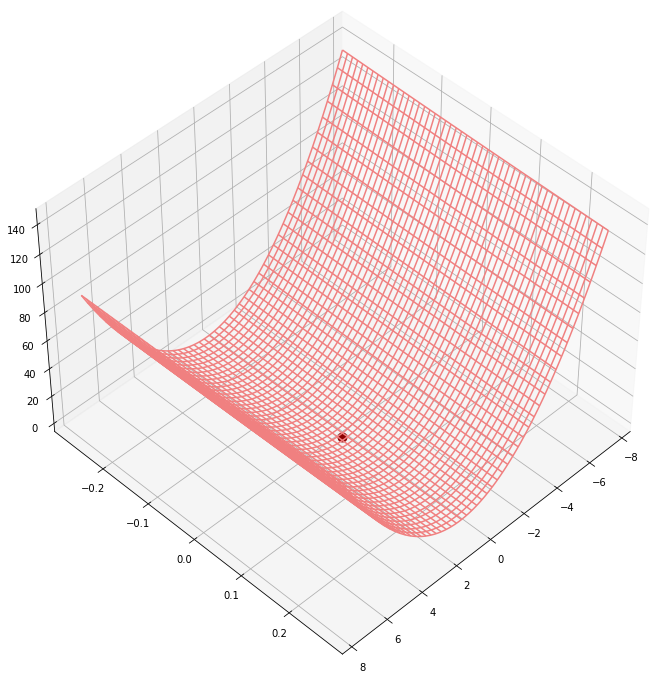

In [76]:
plot_3d(x_min, f_min, POV=[45, 45]) 

In [77]:
def func_1(al):
    return func(x - al * grad(x))

In [78]:
%%time 
def find_min(alpha, e, x):
    gr = grad(x)
    # f = func(x - al * gr)

    while norm(gr) > e:

        f = func(x - al * gr)
        minimum = optimize.fmin(func_1,0) 
        alpha = minimum[0]
        x = x - float(alpha) * gr
        gr = grad(x)
        
    x_min = x 
    f_min = func(x)
    return [x_min, f_min]

CPU times: user 9 µs, sys: 2 µs, total: 11 µs
Wall time: 5.96 µs


In [79]:
%%time 
x_min = find_min(alpha, e, x)[0]
f_min = find_min(alpha, e, x)[1]
print(f'Минимум функции достигается в точке с координатами ({x_min[0]}; {f_min}; {x_min[1]})') 

Optimization terminated successfully.
         Current function value: 3.878788
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 3.878788
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 3.878788
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 3.878788
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 3.878788
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 3.878788
         Iterations: 18
         Function evaluations: 36
Минимум функции достигается в точке с координатами (0.7666346372500055; 3.8728407514378826; 0.021901353249999138)
CPU times: user 372 ms, sys: 17.1 ms, total: 389 ms
Wall t

In [83]:
def func_1(x):
    return 2*x

In [84]:
minimum = optimize.fmin(func_1,0) 